Instructions: To complete the following task using Python, please download an
Integrated Development Environment (IDE) of your choice. Ensure that your solution
includes both the written code (input) and its corresponding output. Once completed,
upload your solution in PDF format or any other format you prefer. The questions
are worth 50 points each.

Question 1: Financial Sentiment Analysis
Background:
The utilization of statistical techniques in financial sentiment analysis is often limited
due to complexities in practical applications and a shortage of high-quality training
data. In finance and economics texts, where annotated datasets are scarce and largely
proprietary, this challenge becomes more pronounced. To address this, a collection of
approximately 5000 sentences has been compiled to establish benchmarks for various
modeling techniques.
Dataset:
The original Financial Phrase Bank data contains 4840 sentences, annotated by 16 individuals with robust backgrounds in financial markets, including researchers from Aalto
University School of Business. However, this assignment focuses on approximately 47%
of the dataset, which corresponds to sentences with 100% agreement among the annotators. The analysis will center on sentences with unanimous annotator agreement, labeled
as ’positive’, ’negative’, and ’neutral’.

1. Data Preparation:
• Load and convert the text file into a DataFrame with columns: ’Text’ and
’Sentiment’.

In [2]:
import os
print(os.getcwd())

c:\Users\Micha\github\GWU\SEAS 6414\Class Material\Lecture 07


In [3]:
import pandas as pd
import numpy as np
import datetime as dt
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)

#create a generator to feed the data to the dataframe.
HW6F1 = pd.read_csv('./Q1_FinancialDataset_Sentences_AllAgree.txt',sep='.@',names=['Text','Sentiment'],header=None,engine='python')
#with open('./Q1_FinancialDataset_Sentences_AllAgree.txt', encoding="utf8") as myfile:
#    mydata = (line for line in myfile)
#    HW6F1 = pd.DataFrame(mydata, columns=['line'])
#HW6F1['tag'] = [len(aLine) for aLine in HW6F1.line]
HW6F1

,Text,Sentiment
0,"According to Gran , the company has no plans t...",neutral
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,"In the third quarter of 2010 , net sales incre...",positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive
...,...,...
2259,Operating result for the 12-month period decre...,negative
2260,HELSINKI Thomson Financial - Shares in Cargote...,negative
2261,LONDON MarketWatch -- Share prices ended lower...,negative
2262,Operating profit fell to EUR 35.4 mn from EUR ...,negative


Exploratory Data Analysis (EDA):
• Perform EDA and plot bar charts for the frequency of the top 20 words in
each sentiment category.

<Axes: title={'center': 'Top 20 words for sentiment positive'}>

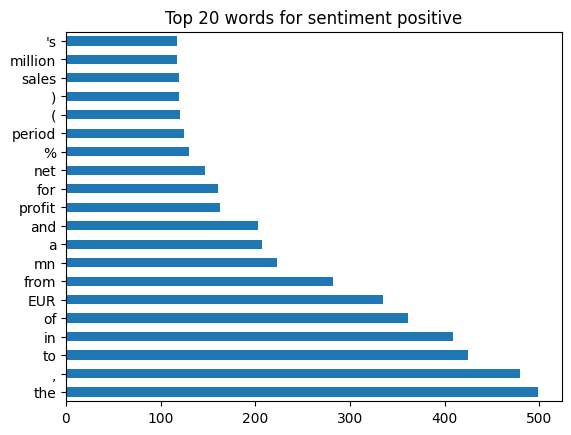

In [4]:
import matplotlib.pyplot as plt
sel = 'positive'
plt.title(f"Top 20 words for sentiment {sel}")
HW6F1.loc[HW6F1['Sentiment'] == sel]['Text'].str.split(expand=True).stack().value_counts()[:20].plot(kind='barh')
# Too many small words and punctuation. I wil get rid of words that are three characters or fewer. But, I can't see a way
# to do this in one line.

<Axes: title={'center': 'Top 20 words (4 or more characters) for sentiment positive'}>

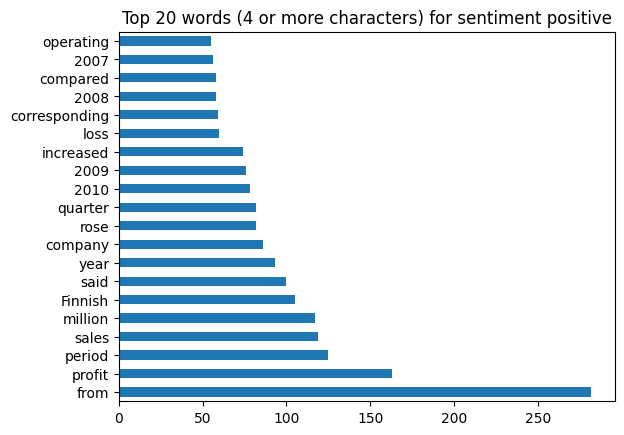

In [22]:
sel = 'positive'
HW6F1Words = HW6F1.loc[HW6F1['Sentiment'] == sel]['Text'].str.split(expand=True).stack().value_counts()
plt.title(f"Top 20 words (4 or more characters) for sentiment {sel}")
HW6F1Words[HW6F1Words.index.str.get(3).notnull()][:20].plot(kind='barh')
# This is much better. I will use this approach. I could remove the years, but that may be better left as a business decision.

<Axes: title={'center': 'Top 20 words (4 or more characters) for sentiment negative'}>

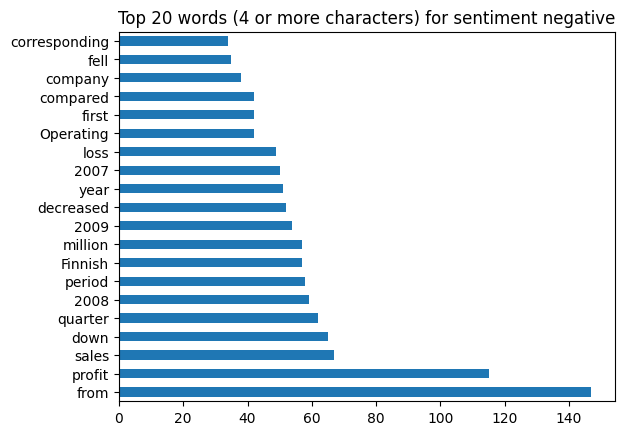

In [23]:
sel = 'negative'
HW6F1Words = HW6F1.loc[HW6F1['Sentiment'] == sel]['Text'].str.split(expand=True).stack().value_counts()
plt.title(f"Top 20 words (4 or more characters) for sentiment {sel}")
HW6F1Words[HW6F1Words.index.str.get(3).notnull()][:20].plot(kind='barh')

<Axes: title={'center': 'Top 20 words (4 or more characters) for sentiment neutral'}>

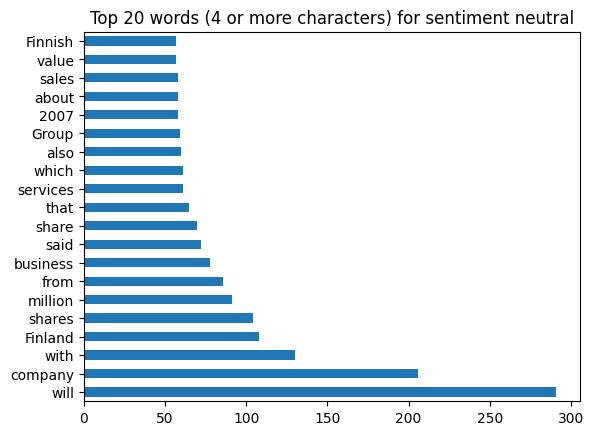

In [24]:
sel = 'neutral'
HW6F1Words = HW6F1.loc[HW6F1['Sentiment'] == sel]['Text'].str.split(expand=True).stack().value_counts()
plt.title(f"Top 20 words (4 or more characters) for sentiment {sel}")
HW6F1Words[HW6F1Words.index.str.get(3).notnull()][:20].plot(kind='barh')


Class Imbalance Analysis:
• Compute and visualize the frequency of each sentiment label with a bar graph.
Discuss class imbalance.

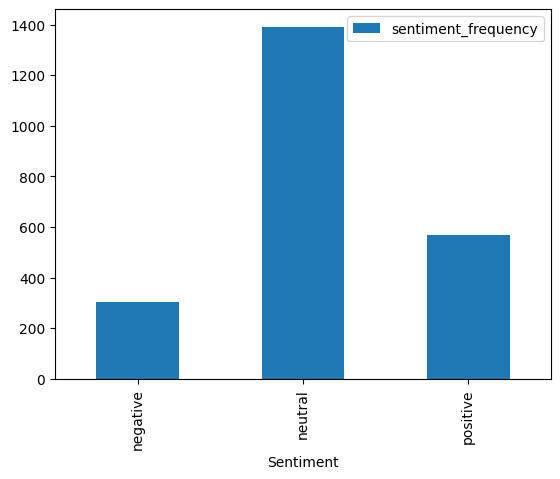

In [5]:
HW6F1Group = HW6F1.groupby("Sentiment").agg(
    sentiment_frequency=("Text", "count")
).plot(kind='bar')

I would have expected the sentiment of 'negative' to be the most frequent. This is because people generally do not speak up unless they have a complaint. But it may have to do with the source. The 'neutral' sentiment may be the most common since it is not a customer service site.

Word Count Analysis:
• Create box plots for word/token counts per sentiment label. Discuss discrepancies.

,Text,Sentiment,wordcount
0,"According to Gran , the company has no plans t...",neutral,24
1,"For the last quarter of 2010 , Componenta 's n...",positive,38
2,"In the third quarter of 2010 , net sales incre...",positive,28
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive,23
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive,21
...,...,...,...
2259,Operating result for the 12-month period decre...,negative,26
2260,HELSINKI Thomson Financial - Shares in Cargote...,negative,39
2261,LONDON MarketWatch -- Share prices ended lower...,negative,25
2262,Operating profit fell to EUR 35.4 mn from EUR ...,negative,22


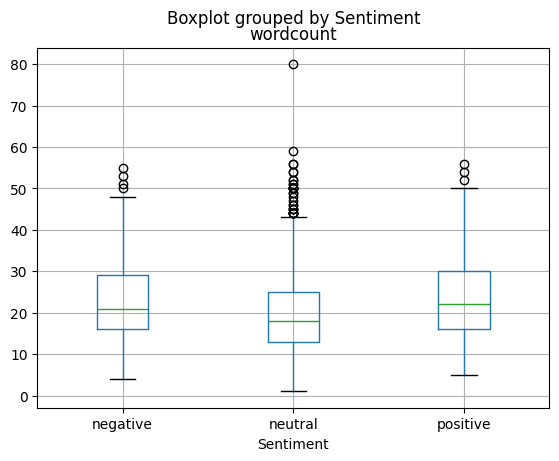

In [9]:
#sel = 'positive'
#HW6F1WordsP = HW6F1.loc[HW6F1['Sentiment'] == sel]['Text'].str.split(expand=True).stack().value_counts().to_frame().rename(columns={"count":sel})
#HW6F1WordsP['Sentiment'] = sel
#sel = 'negative'
#HW6F1WordsN = HW6F1.loc[HW6F1['Sentiment'] == sel]['Text'].str.split(expand=True).stack().value_counts().to_frame().rename(columns={"count":sel})
#HW6F1WordsN['Sentiment'] = sel
#sel = 'neutral'
#HW6F1WordsU = HW6F1.loc[HW6F1['Sentiment'] == sel]['Text'].str.split(expand=True).stack().value_counts().to_frame().rename(columns={"count":sel})
#HW6F1WordsJ = HW6F1WordsP.join(HW6F1WordsN, how='outer')
#HW6F1Words = HW6F1WordsJ.join(HW6F1WordsU, how='outer')
#HW6F1Words.fillna(0,inplace=True)
#HW6F1Words.reset_index(drop=True, inplace=True)

HW6F1['wordcount'] = HW6F1['Text'].apply(lambda x: len(str(x).split()))

#HW6F1WordsU['Sentiment'] = sel
#HW6F1Words = pd.concat([HW6F1WordsP, HW6F1WordsN, HW6F1WordsU])
#plt.title(f"Top 20 words (4 or more characters) for sentiment {sel}")
#HW6F1Words[HW6F1Words.index.str.get(3).notnull()][:20].plot(kind='barh')
#HW6F1Words = HW6F1['Text'].str.split(expand=True).stack().value_counts()
HW6F1.boxplot(by = 'Sentiment', column=['wordcount'])
HW6F1
#print(type(HW6F1Words))

My expectation would have been that negative would have the longest sentences followed by neutral and then positive. They are all about the same but neutral has far more outliers. All the outliers are in the direction of longer sentences. The neutral sentences must be considering more topics and that is what makes them longer. Maybe the reviewers did not have time to fully read and understand long sentences, so they defaulted to marking them as neutral.

Data Splitting:
• Split data into training (80%) and testing (20%) sets using stratified splitting with a random seed of 64.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(HW6F1.drop('Sentiment', axis=1), HW6F1['Sentiment'], test_size=0.2, random_state=64, stratify=HW6F1['Sentiment'])

print('X_train shape:', X_train.shape)
print('y_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', X_test.shape)
print(X_test)
print(y_test)

X_train shape: (1811, 2)
y_train shape: (1811, 2)
X_test shape: (453, 2)
y_test shape: (453, 2)
                                                   Text  wordcount
138   In the second quarter of 2010 , the group 's n...         24
55    However , Biohit estimates its total net sales...         29
1568  With five different game modes , co-op tournam...         30
1345  Retail chain Suomen L+ņhikauppa was given the ...         43
958   Electronic versions require 24-48 hours as eac...         19
...                                                 ...        ...
1952  Mr. Kari Stadigh will carry on as Chairman of ...         17
2091  As part of the transaction , M-real and Sappi ...         28
292   Jan. 6 -- Ford is struggling in the face of sl...         23
2047  Agricultural newspaper Maaseudun Tulevaisuus h...         14
2029  Net sales dropped by 6 % year-on-year to EUR 1...         11

[453 rows x 2 columns]
138     positive
55      positive
1568     neutral
1345     neutral
958     

Model Development and Evaluation:
• Vectorization: Use CountVectorizer and Tf-Idf.
• Model Training: Employ Naive Bayes
• Model Training - Bonus Question (5pts): Employ Random Forest and
Support Vector Machines.
• Metrics Tracking: Present Accuracy, Precision, Recall, F1-Score for each
class, and an overall Confusion Matrix.
• Analysis: Discuss the effectiveness of each model based on the tracked metrics.

In [16]:
# Vectorization: Use CountVectorizer and Tf-Idf.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vec = CountVectorizer()
X = vec.fit_transform(X_train['Text'])
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
vec = TfidfVectorizer()
X = vec.fit_transform(X_train['Text'])
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())


00  000  002  0025  003  0030  008   01  0101138  012   02  023  027   03  030   04  045  047   05  050   06  063   07  070  0711  0762   08  083  084  087   09  094  097   10  100  1000  100mn  101  102  103  104  105  106  107  109mn  10mn   11  110  111  1112  112  113  115  116  117mn  118  119  11m   12  120  1200  121  122  123  124  128  129  12mp   13  130  131  133  135  138  139   14  140  1411  142  143  145  146  146mn  149   15  150  150mn  151  152  155  156  159   16  160  161  162  163  164  1649  165  168   17  170  172  174  175  177mn  179mn  17m   18  184  188  188mn  189   19  190  191  1920  1923  193  1930s  1944757  1946  1964  1966  1983  1985  1987  1989  1996  1997  1998  1999  19mn   20  200  2000  2001  2002  2003  2004  2004b  2005  2006  2006a  2007  2007a  2008  2009  201  2010  2011  2012  2013  2014  2016  205  207  20m  20mn   21  210  211  213  215  217  218   22  220   23  2310  232  235  239   24  241  244  245  249   25  250  253  256  259  25cm  25mn   26  260  2610  262  267mn   27  270  275  27mn   28  283   29  2900  298  2982   2m  2mn   30  300  3000  300mn  302  305  309  30mn  30s   31  310  319   32  320  321  322  323   33  330  331  333  334  335  337   34  347  349   35  350  3539  358  3588   36  360  365  368  369  36m   37  377   38  380  384  385  388   39  3931  3932  395  397  398  3bn   3c   3d   3g  3mn   40  400  401  402  408   41  410  415   42  421   43  435  438  43pc   44  44million   45  452  455  457  45mn   46  460  462  467   47  470  473  474   48  483  486  487   49  495  496  497  4mn  4th   50  500  505   51  513  516   52  520  523  525   53  530  530773  5320xm  534  538  53mn   54  540  544   55  5500  553  554  556   56  561  565  566  569   57  5700  575  578  579   58  580  5800  582  585us  587   59  591  5mn   60  600  600050  600mn  609   61  6110  612  6120  614   62  620  6210  6220  626  627  628  629   63  634   64  640   65  655  659  65mn   66  661  664  666  669   67  \
0    0.00 0.00 0.00  0.00 0.00  0.00 0.00 0.00     0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00   0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   0.00  0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00   0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00   0.00 0.00 0.00 0.00   0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   0.00   0.00 0.00 0.00 0.00 0.00   0.00 0.00 0.00 0.00 0.00  0.00  0.00 0.00   0.00     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00 0.00  0.00  0.00  0.00  0.00  0.00   0.00  0.00  0.00   0.00  0.00   0.00  0.00  0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00  0.00 0.00 0.00  0.00 0.00   0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00  0.00 0.00  0.00 0.00 0.00 0.00 0.00  0.00   0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00       0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00    0.00    0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00   0.00 0.00 0.00 0.00 0.00 0.00 0.00    0.00   0.00 0.00 0.00  0.00 0.00  0.00 0.00 0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1    0.19

In [47]:
# Model Training: Employ Naive Bayes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train['Text'], y_train)
labels = model.predict(X_test['Text'])

In [48]:
# Metrics Tracking: Present Accuracy, Precision, Recall, F1-Score for each class
acc = accuracy_score(y_test, labels)
prec = precision_score(y_test, labels, average='macro')
recall = recall_score(y_test, labels, average='macro')
f1score = f1_score(y_test, labels, average='macro')

print(f"For the Naïve Bayes, the accuracy is {acc} the precision is {prec} the recall is {recall} and th F1 Score is {f1score}.")

For the Naïve Bayes, the accuracy is 0.7571743929359823 the precision is 0.8107263107263107 the recall is 0.5387286374524194 and th F1 Score is 0.5332706895190075.


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression model')

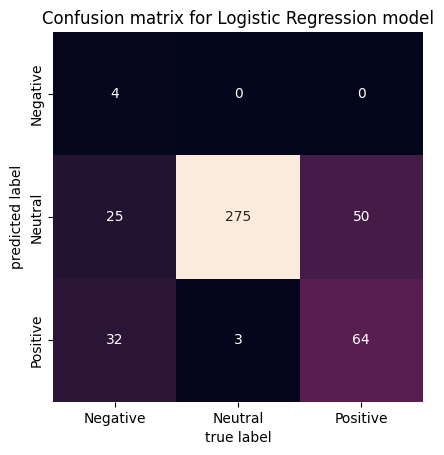

In [36]:
# An overall Confusion Matrix.
from sklearn.metrics import confusion_matrix
import seaborn as sns;

classes = ['Negative', 'Neutral', 'Positive']
title = 'Confusion matrix for Naïve Bayes model'
mat = confusion_matrix(y_test, labels)
#sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title(title)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

model = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=100, random_state=0))
model.fit(X_train['Text'], y_train)
labels = model.predict(X_test['Text'])


In [50]:
acc = accuracy_score(y_test, labels)
prec = precision_score(y_test, labels, average='macro')
recall = recall_score(y_test, labels, average='macro')
f1score = f1_score(y_test, labels, average='macro')

print(f"For the Random Forest, the accuracy is {acc} the precision is {prec} the recall is {recall} and th F1 Score is {f1score}.")

For the Random Forest, the accuracy is 0.8498896247240618 the precision is 0.882760070995365 the recall is 0.7300354711916404 and th F1 Score is 0.780400742117571.


Text(0.5, 1.0, 'Confusion matrix for Random Forest model')

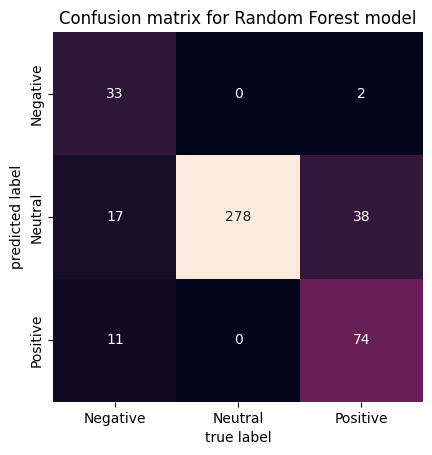

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns;

classes = ['Negative', 'Neutral', 'Positive']
title = 'Confusion matrix for Random Forest model'
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title(title)